In [192]:
%matplotlib inline
import pandas as pd
import sklearn.linear_model as lm
from sklearn import metrics
import numpy as np
import seaborn as sns

In [193]:
# Обучающая выборка
data = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTrain_carListings.zip')

In [194]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [195]:
data.shape

(500000, 6)

In [196]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

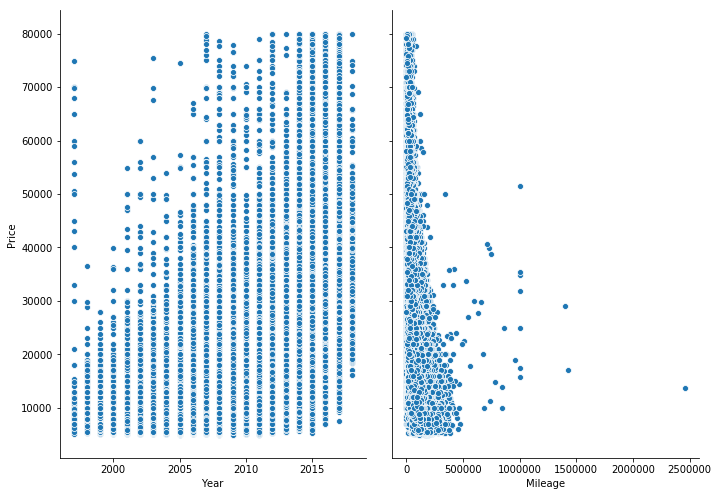

In [197]:
#data.plot(kind='scatter', y='Price', x='Year')
sns.pairplot(data, x_vars=['Year','Mileage'], y_vars='Price', height=7, aspect=0.7)

In [198]:
#Записываем массив Prices в  массив эндогенных переменных
y = data.iloc[:,0]

In [199]:
y.head()

0    21490
1    21250
2    20925
3    14500
4    32488
Name: Price, dtype: int64

In [200]:
#Записываем массивы Year, Mileage в  массивы экзогенных переменных
x = data.iloc[:,[1,2]]
x.head()

,Year,Mileage
0,2014,31909
1,2016,25741
2,2016,24633
3,2012,84026
4,2013,22816


In [201]:
# создаем пустую модель
skm = lm.LinearRegression()
# запускаем расчет параметров для указанных данных
skm.fit(x, y)
# и выведем параметры рассчитанной модели
print(skm.intercept_, skm.coef_)

-1886959.668256542 [ 9.49611186e+02 -6.62842983e-02]


In [202]:
data_test = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTest_carListings.zip', index_col=0)

In [203]:
data_test.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2015,23388,OH,Ford,EscapeFWD
1,2014,45061,PA,Ford,EscapeSE
2,2007,101033,WI,Toyota,Camry4dr
3,2015,13590,HI,Jeep,Wrangler
4,2009,118916,CO,Dodge,Charger4dr


In [204]:
x_test_year = data_test.iloc[:,0]
x_test_mileage = data_test.iloc[:,1]

In [205]:
# Рассчитываем прогнозную стоимость для тестовой выборки
y_pred = round(pd.Series.to_frame(skm.intercept_ + skm.coef_[0] * x_test_year + skm.coef_[1] * x_test_mileage, name="Price"),2)

In [206]:
#Итоговая таблица
data_test_new = pd.merge(y_pred, data_test, on='ID')
data_test_new.head()

,Price,Year,Mileage,State,Make,Model
ID,,,,,,
0,24956.62,2015,23388,OH,Ford,EscapeFWD
1,22570.42,2014,45061,PA,Ford,EscapeSE
2,12213.08,2007,101033,WI,Toyota,Camry4dr
3,25606.07,2015,13590,HI,Jeep,Wrangler
4,12926.94,2009,118916,CO,Dodge,Charger4dr


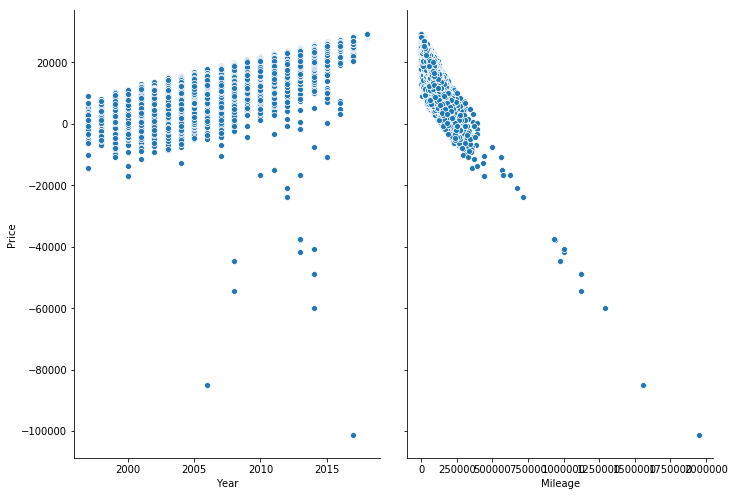

In [207]:
#data_test_new.plot(kind='scatter', y='Price', x='Year')
sns.pairplot(data_test_new, x_vars=['Year','Mileage'], y_vars='Price', height=7, aspect=0.7)

In [208]:
# Доля отрицательных прогнозных значений
data_test_new_minus = data_test_new.loc[data_test_new['Price'] < 0]
print('Доля строк с отрицательными ценами:', data_test_new_minus.Price.count()/data_test_new.Price.count()*100, '%')


Доля строк с отрицательными ценами: 0.1656 %


In [209]:
# Удаление отрицательных цен из прогнозных значений
data_test_new_plus = data_test_new.loc[data_test_new['Price'] > 0]
data_test_new_plus.head()

,Price,Year,Mileage,State,Make,Model
ID,,,,,,
0,24956.62,2015,23388,OH,Ford,EscapeFWD
1,22570.42,2014,45061,PA,Ford,EscapeSE
2,12213.08,2007,101033,WI,Toyota,Camry4dr
3,25606.07,2015,13590,HI,Jeep,Wrangler
4,12926.94,2009,118916,CO,Dodge,Charger4dr


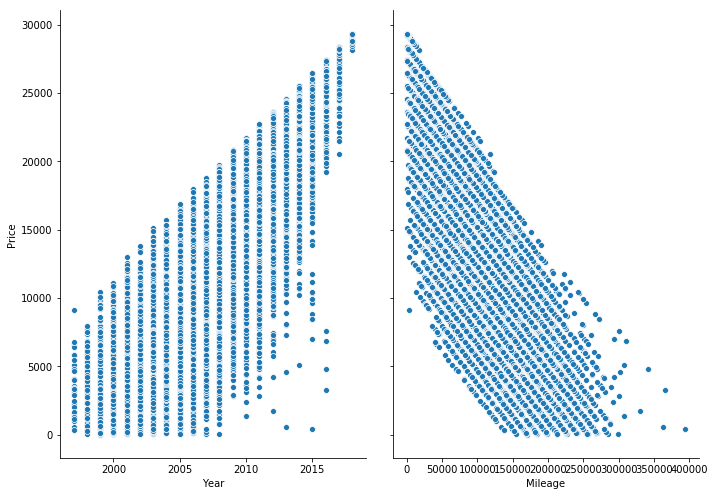

In [163]:
#data_test_new_plus.plot(kind='scatter', y='Price', x='Year')
sns.pairplot(data_test_new_plus, x_vars=['Year','Mileage'], y_vars='Price', height=7, aspect=0.7)